Our code for "Google Chrome" task

In [ ]:
"""Google Chrome history"""
def sites_on_date(visits: list, date: str) -> set:
    """
    Returns set of all urls that have been visited
    on current date
    :param visits: all visits in browser history
    :param date: date in format "yyyy-mm-dd"
    :return: set of url visited on date
    >>> print(sites_on_date([('https://www.youtube.com/?hl=uk&gl=UA', \
'YouTube', '2023-10-21', '14:26:55.421209', 757275), \
('https://www.youtube.com/?hl=uk&gl=UA', 'YouTube', '2023-10-22', '14:26:56.177574', 105387), \
('https://www.youtube.com/?hl=uk&gl=UA&themeRefresh=1', 'YouTube', '2023-10-21', \
'14:26:56.281244', 1143648), \
('https://www.youtube.com/', 'YouTube', '2023-10-21', '14:26:57.423119', 150277232)], '2023-10-22'))
    {'https://www.youtube.com/?hl=uk&gl=UA'}
    """
    if isinstance(visits, list) and isinstance(date, str):
        inf = set()
        for item in visits:
            if date in item:
                inf.add(item[0])
        return inf
    return None

def most_frequent_sites(visits: list, number: int) -> set:
    """
    Returns set of most frequent sites visited in total
    Return only 'number' of most frequent sites visited
    :param visits: all visits in browser history
    :param number: number of most frequent sites to return
    :return: set of most frequent sites
    >>> print(most_frequent_sites([('https://www.youtube.com/?hl=uk&gl=UA', \
'YouTube', '2023-10-21', '14:26:55.421209', 757275), \
('https://www.youtube.com/?hl=uk&gl=UA', 'YouTube', '2023-10-21', '14:26:56.177574', 105387), \
('https://www.youtube.com/?hl=uk&gl=UA&themeRefresh=1', 'YouTube', '2023-10-21', \
'14:26:56.281244', 1143648), \
('https://www.youtube.com/', 'YouTube', '2023-10-21', '14:26:57.423119', 150277232)], 1))
    {'https://www.youtube.com/?hl=uk&gl=UA'}
    """
    if isinstance(visits, list) and isinstance(number, int):
        dictionary = {}
        for item in visits:
            if item[0] not in dictionary:
                dictionary[item[0]] = 1
            else:
                dictionary[item[0]] += 1
        sorted_dict_descending = dict(sorted(dictionary.items(), key=lambda item: item[1], \
            reverse=True))
        most_frequent = set()
        counter = 0
        for value in sorted_dict_descending:
            if counter != number:
                most_frequent.add(value)
                counter += 1
            else:
                break
        return most_frequent

def get_url_info(visits: list, url: str) -> tuple:
    """
    Returns tuple with info about site, which title is passed
    Function should return:
    title - title of site with this url
    last_visit_date - date of the last visit of this site, in format "yyyy-mm-dd"
    last_visit_time - time of the last visit of this site, in format "hh:mm:ss.ms"
    num_of_visits - how much time was this site visited
    average_time - average time, spend on this site
    :param visits: all visits in browser history
    :param url: url of site to search
    :return: (title, last_visit_date, last_visit_time, num_of_visits, average_time)
    >>> print(get_url_info([('https://www.youtube.com/?hl=uk&gl=UA', \
'YouTube', '2023-10-21', '14:26:55.421209', 757275), \
('https://www.youtube.com/?hl=uk&gl=UA', 'YouTube', '2023-10-21', '14:26:56.177574', 105387), \
('https://www.youtube.com/?hl=uk&gl=UA&themeRefresh=1', 'YouTube', '2023-10-21', \
'14:26:56.281244', 1143648), \
('https://www.youtube.com/', 'YouTube', '2023-10-21', '14:26:57.423119', 150277232)], \
'https://www.youtube.com/?hl=uk&gl=UA'))
    ('YouTube', '2023-10-21', '14:26:56.177574', 2, 431331.0)
    >>> get_url_info([], "https://mail.google.com/mail/u/0/")

    """
    if isinstance(visits, list) and isinstance(url, str) and len(visits) != 0:
        num_of_visits = 0
        aver_time = []
        for item in visits:
            if url in item:
                num_of_visits += 1
                title = item[1]
                last_visit_date = item[2]
                last_visit_time = item[3]
                aver_time.append(item[-1])
        if num_of_visits == 0:
            return ('', '', '', 0, 0)
        try:
            average_time = sum(aver_time) / len(aver_time)
        except ZeroDivisionError:
            average_time = 0
        try:
            result = (title, last_visit_date, last_visit_time, num_of_visits, average_time)
            return result
        except UnboundLocalError:
            return None
    return None

if __name__ == '__main__':
    import doctest
    print(doctest.testmod())

Request 1: (description of task)

Write unittests for this task

In [ ]:
import unittest
from history_analysis import sites_on_date, most_frequent_sites, get_url_info


class TestSitesOnDate(unittest.TestCase):

    def test_sites_on_date(self):
        visits = [
            ('https://www.youtube.com/?hl=uk&gl=UA', 'YouTube', '2023-10-21', '14:26:55.421209', 757275),
            ('https://www.youtube.com/?hl=uk&gl=UA', 'YouTube', '2023-10-22', '14:26:56.177574', 105387),
            ('https://www.youtube.com/?hl=uk&gl=UA&themeRefresh=1', 'YouTube', '2023-10-21', '14:26:56.281244', 1143648),
            ('https://www.youtube.com/', 'YouTube', '2023-10-21', '14:26:57.423119', 150277232),
        ]
        date = '2023-10-22'

        expected_sites = {'https://www.youtube.com/?hl=uk&gl=UA'}
        actual_sites = sites_on_date(visits, date)

        self.assertEqual(expected_sites, actual_sites)


class TestMostFrequentSites(unittest.TestCase):

    def test_most_frequent_sites(self):
        visits = [
            ('https://www.youtube.com/?hl=uk&gl=UA', 'YouTube', '2023-10-21', '14:26:55.421209', 757275),
            ('https://www.youtube.com/?hl=uk&gl=UA', 'YouTube', '2023-10-21', '14:26:56.177574', 105387),
            ('https://www.youtube.com/?hl=uk&gl=UA&themeRefresh=1', 'YouTube', '2023-10-21', '14:26:56.281244', 1143648),
            ('https://www.youtube.com/', 'YouTube', '2023-10-21', '14:26:57.423119', 150277232),
            ('https://www.google.com/', 'Google', '2023-10-22', '14:26:58.423119', 150277232),
            ('https://www.google.com/', 'Google', '2023-10-22', '14:26:59.423119', 150277232),
        ]
        number = 1

        expected_sites = {'https://www.youtube.com/?hl=uk&gl=UA'}
        actual_sites = most_frequent_sites(visits, number)

        self.assertEqual(expected_sites, actual_sites)


class TestGetURLInfo(unittest.TestCase):

    def test_most_frequent_sites_single(self):
        visits = [
            ('https://www.youtube.com/?hl=uk&gl=UA', 'YouTube', '2023-10-21', '14:26:55.421209', 757275),
            ('https://www.youtube.com/?hl=uk&gl=UA', 'YouTube', '2023-10-21', '14:26:56.177574', 105387),
            ('https://www.google.com/', 'Google', '2023-10-22', '14:26:58.423119', 150277232),
        ]
        number = 1

        expected_sites = {'https://www.youtube.com/?hl=uk&gl=UA'}
        actual_sites = most_frequent_sites(visits, number)

        self.assertEqual(expected_sites, actual_sites)

    def test_most_frequent_sites_multiple(self):
        visits = [
            ('https://www.youtube.com/?hl=uk&gl=UA', 'YouTube', '2023-10-21', '14:26:55.421209', 757275),
            ('https://www.youtube.com/?hl=uk&gl=UA', 'YouTube', '2023-10-21', '14:26:56.177574', 105387),
            ('https://www.google.com/', 'Google', '2023-10-22', '14:26:58.423119', 150277232),
            ('https://www.google.com/', 'Google', '2023-10-22', '14:26:59.423119', 150277232),
        ]
        number = 2

        expected_sites = {'https://www.google.com/'}
        actual_sites = most_frequent_sites(visits, number)

        self.assertEqual(expected_sites, actual_sites)

if __name__ == '__main__':
    unittest.main()

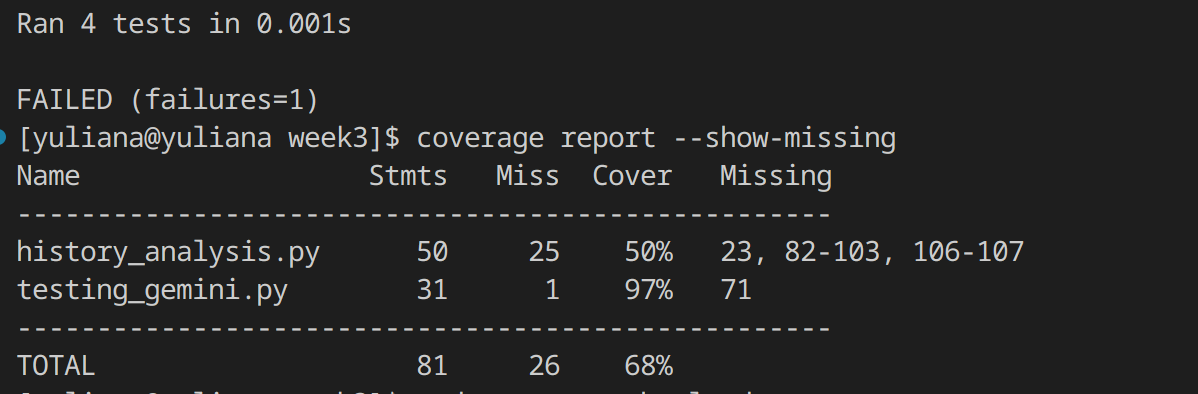

Request 2: Cover get_url_info function with unittests

In [ ]:
import unittest
from history_analysis import sites_on_date, most_frequent_sites, get_url_info


class TestSitesOnDate(unittest.TestCase):

    def test_sites_on_date(self):
        visits = [
            ('https://www.youtube.com/?hl=uk&gl=UA', 'YouTube', '2023-10-21', '14:26:55.421209', 757275),
            ('https://www.youtube.com/?hl=uk&gl=UA', 'YouTube', '2023-10-22', '14:26:56.177574', 105387),
            ('https://www.youtube.com/?hl=uk&gl=UA&themeRefresh=1', 'YouTube', '2023-10-21', '14:26:56.281244', 1143648),
            ('https://www.youtube.com/', 'YouTube', '2023-10-21', '14:26:57.423119', 150277232),
        ]
        date = '2023-10-22'

        expected_sites = {'https://www.youtube.com/?hl=uk&gl=UA'}
        actual_sites = sites_on_date(visits, date)

        self.assertEqual(expected_sites, actual_sites)

    def test_sites_on_date_no_matches(self):
        visits = [
            ('https://www.youtube.com/?hl=uk&gl=UA', 'YouTube', '2023-10-21', '14:26:55.421209', 757275),
            ('https://www.youtube.com/?hl=uk&gl=UA', 'YouTube', '2023-10-22', '14:26:56.177574', 105387),
            ('https://www.youtube.com/?hl=uk&gl=UA&themeRefresh=1', 'YouTube', '2023-10-21', '14:26:56.281244', 1143648),
            ('https://www.youtube.com/', 'YouTube', '2023-10-21', '14:26:57.423119', 150277232),
        ]
        date = '2023-10-23'

        expected_sites = set()
        actual_sites = sites_on_date(visits, date)

        self.assertEqual(expected_sites, actual_sites)

    def test_sites_on_date_empty_visits(self):
        visits = []
        date = '2023-10-23'

        expected_sites = set()
        actual_sites = sites_on_date(visits, date)

        self.assertEqual(expected_sites, actual_sites)


class TestMostFrequentSites(unittest.TestCase):

    def test_most_frequent_sites_single(self):
        visits = [
            ('https://www.youtube.com/?hl=uk&gl=UA', 'YouTube', '2023-10-21', '14:26:55.421209', 757275),
            ('https://www.youtube.com/?hl=uk&gl=UA', 'YouTube', '2023-10-21', '14:26:56.177574', 105387),
            ('https://www.google.com/', 'Google', '2023-10-22', '14:26:58.423119', 150277232),
        ]
        number = 1

        expected_sites = {'https://www.youtube.com/?hl=uk&gl=UA'}
        actual_sites = most_

After this request the Gemini`s responses began to repeat themselves, regardless of the requests made.